# 라이브러리 로드

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 머신러닝 파이프라인 소개

**1. 데이터셋 확인**

실무 데이터가 아닌 캐글에서 제공되는 데이터들은 잘 정제되어 있음.

하지만 가끔 결측치 데이터가 존재함.

이를 적절하게 처리하는 방법이 필요.

**2. 탐색적 데이터 분석(exploratory data analysis)**

여러 독립변수(feature)들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인할 필요가 있음.

시각화 툴을 이용하여 insight를 얻는 것이 필요.

**3. feature engineering**

모델을 만들기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering(가공)을 해야함.

예를 들어, 범주형 데이터 같은 경우에는 one-hot encdoing, 연속형 변수들을 범주형 변수로 바꾼다던가 또는 구간으로 나눈다던가, 텍스트 데이터를 전처리 한다는등 데이터 가공이 필요함.

**4. model 선택**

여기서는 sklearn을 사용해서 모델을 만듬.

그 외의, xgboost, lgbm, tensorflow, pytorch등 다양한 것들을 통해서 모델을 만들 수 있음.

**5. 모델 학습 및 예측**

훈련 데이터 셋을 가지고 모델을 학습시키고, 테스테 데이터 셋을 가지고 예측을 함.

**6. 모델 평가**

예측 성능이 원하는 수준인지 평가하고 판단함.

풀려는 문제에 따라 모델을 평가하는 방식이 달라짐. 즉, 평가지표가 달라진다는 말.

# Dataset 확인

- 정형데이터를 다루기 위해서 pandas를 사용.

- 간단한 통계적 분석 + 복잡한 데이터 처리를 할 수 있음

In [2]:
# 훈련 데이터 셋과 테스트 데이터 셋을 로드
df_train = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


titanic 튜토리얼에서 다루고자 하는 독립변수(feature)는 Pclass, Age, SibSp, Parch, Fare이며, 종속변수(target)은 Survived 임.

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerId의 개수가 다른 독립변수(feature)가 존재 한다는 것을 알 수 있음.

## Null data check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- 훈련 데이터 셋, 테스트 데이터 셋에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarket(Train만 0.22%) 결측치가 존재한다는 것을 확인할 수 있음.

- MANO 라이브러리를 사용해서 null data의 존재를 더 쉽게 볼 수 있음.

<AxesSubplot:>

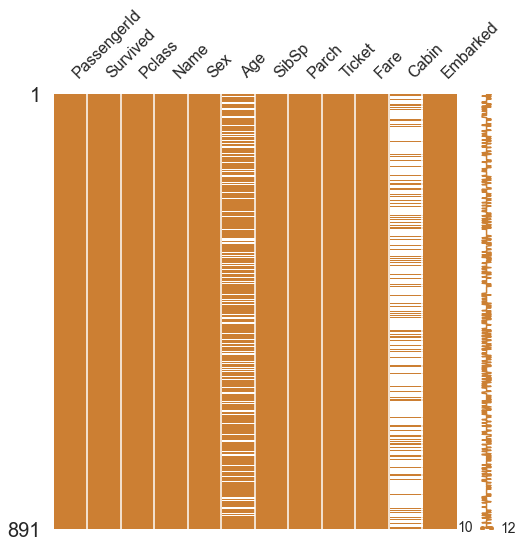

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

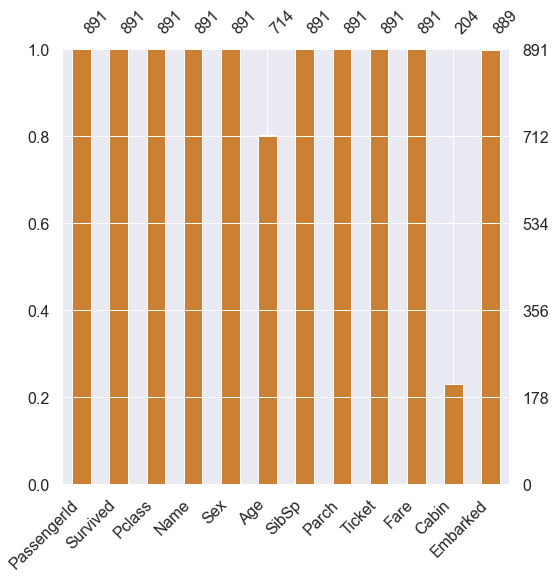

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

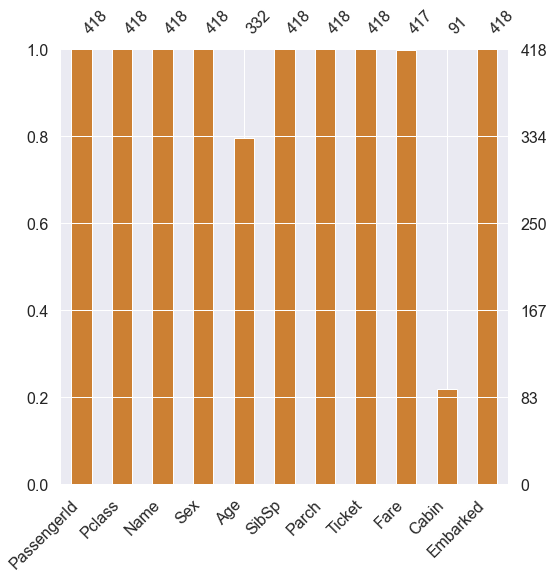

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## Target label 확인

Target label이 어떤 분포을 가지고 있는지 확인하는 것이 중요.

분류 문제에서는 어떤 분포를 가지고 있냐에 따라서 어떤 평가지표를 사용하는 것이 결정되기 때문.

하지만 대회에서는 어떤 평가지표를 사용하라고 주기 때문에 신경 쓸 부분은 아님.

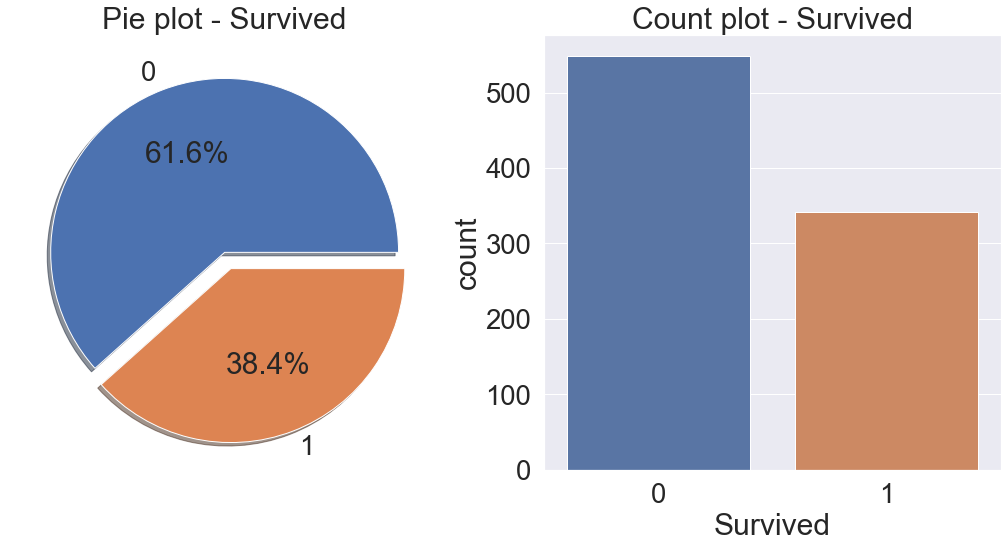

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 죽은 사람의 비율 61.6 %, 생존자 38.4%

- 1:1 비율을 균일하다고 봤을 때, 3:2 비율도 어느정도 균일하다고 볼 수 있음.

- 극단적으로 target label의 분포가 치우쳐져 있을 때는 평가지표로 정확도를 사용하는 것이 좋지 않음. (F1 스코어가 훨씬 좋음)

# Exploratory data analysis(탐색적 데이터 분석)

- 데이터 안에 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요

- matplotlib, seaborn, plotly등을 사용하여, 적절하게 사용하는 것이 중요.

## Pclass

- Pclass는 ordinal, 범주형이면서 순서가 있는 데이터

- Pclass에 따라서 생존률의 차이가 있다면, Pclass를 사용하는 것 만으로도 모델 학습에 도움이 됨.

<AxesSubplot:xlabel='Pclass'>

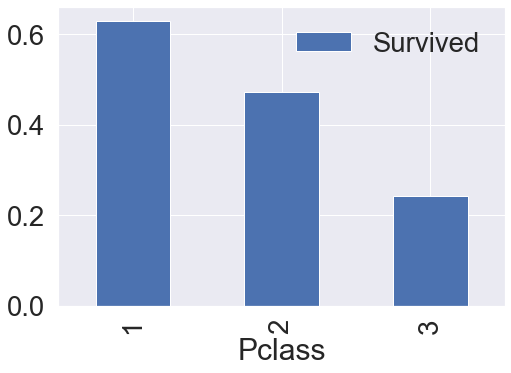

In [12]:
# 'Pclass', 'Survived'를 가져온후, pclass로 묶은 다음
# pclass 마다 0, 1에 대하여 개수를 센 후, 이것을 평균내면 각 pclass 별 생존률을 구할 수 있음.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인할 수 있음.

- matplotlib을 이용해서 이를 할러면 번거로운 작업임

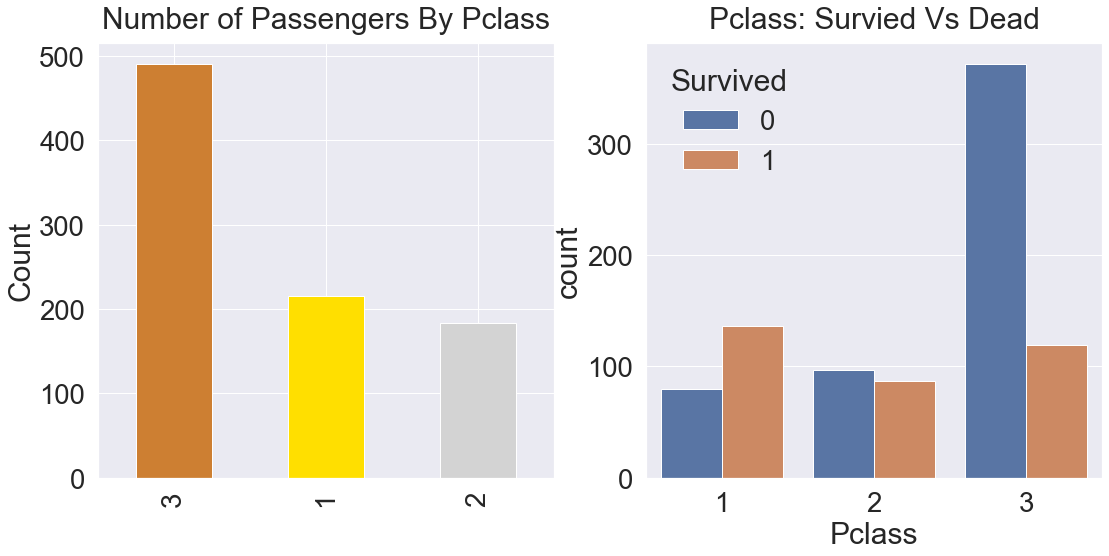

In [13]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survied Vs Dead', y=y_position)
plt.show()

- Pclass가 높을 수록 생존 확률이 높다는 것을 알 수 있음.

- 1, 2, 3 순서대로 63%, 48%, 25% 임.

- 이를 통해서 생존에 Pclass(독립변수)가 영향을 준다는 사실을 알 수 있음.

## Sex

- 성별로 생존률이 어떻게 달라지는 지 확인

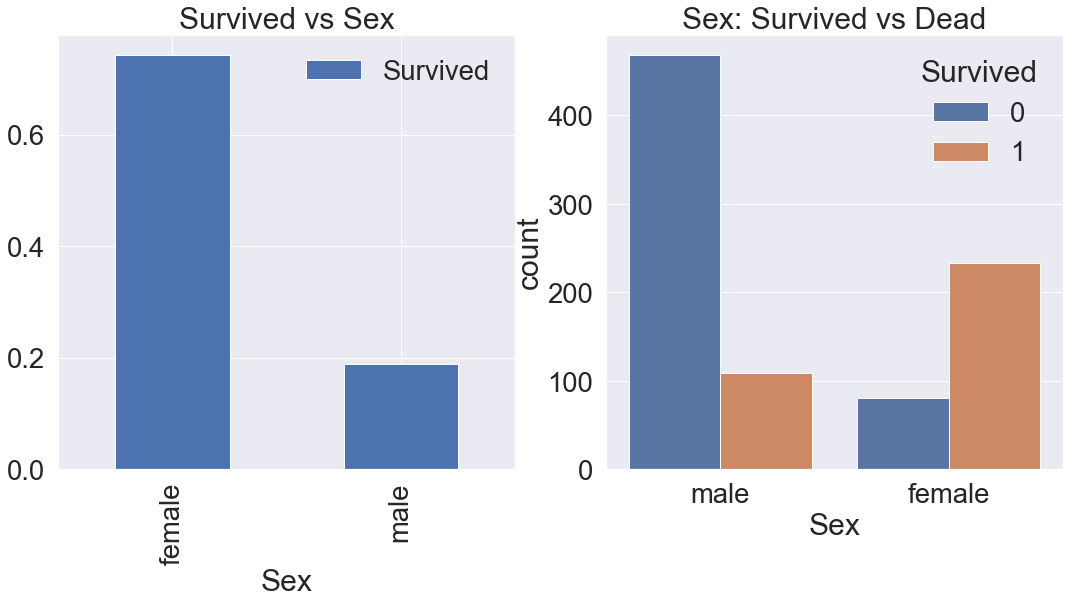

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여성이 생존할 확률이 높다는 것을 알 수 있음.

In [15]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Sex도 예측 모델에 쓰일 중요한 독립변수(featuer)라는 것을 알 수 있음.

## Both Sex and Pclass

- 한 가지 독립변수를 가지고 종속변수가 어떻게 달라지는지 확인하는 것 뿐만 아니라 여러 개의 독립변수를 가지고 종속변수가 어떻게 달라지는지 확인하는 것도 중요함

- 여기서는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인함.

- seaborn의 factorplot을 이용해서, 3개의 차원으로 이루어진 그래프를 그려서 확인함

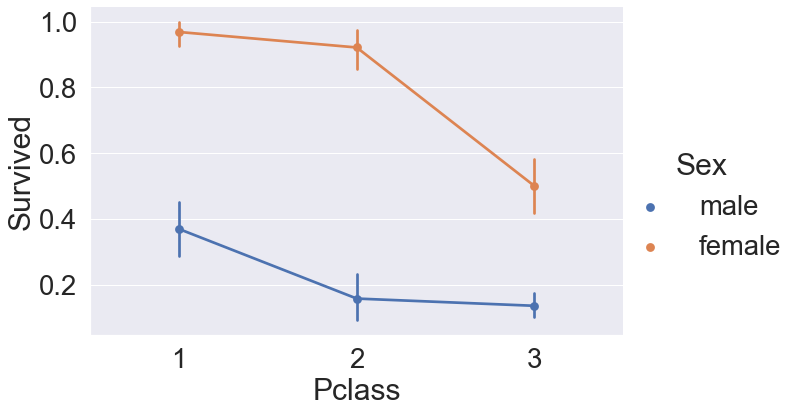

In [17]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 Pclass에서 female이 살 확률이 male 보다 높은 것을 알 수 있음.

- 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높음

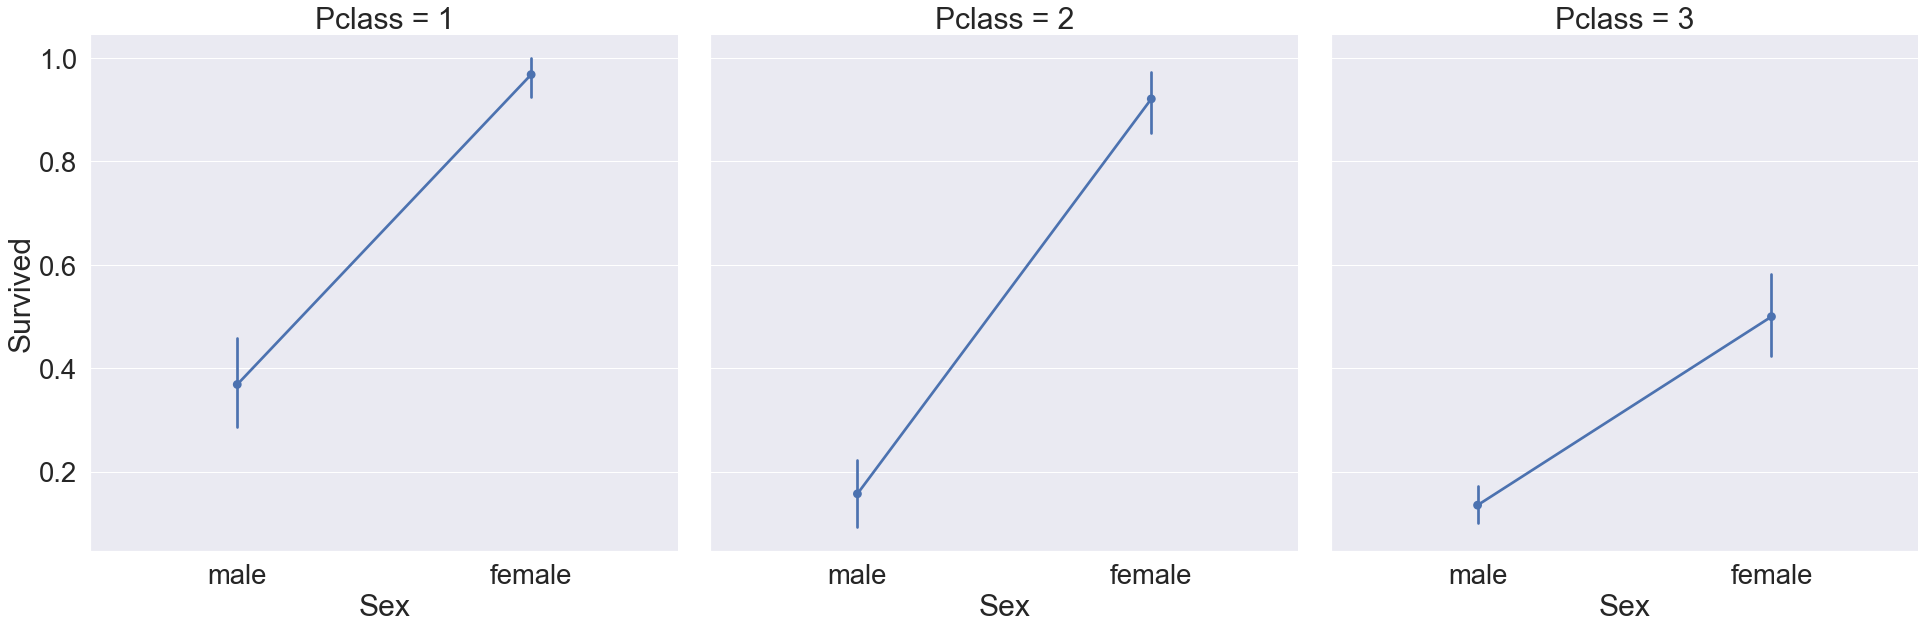

In [18]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureaton=.5, size=9, aspect=1)

## Age

- Age와 생존률이 어떻게 달라지는지 확인

In [19]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train.Age.max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train.Age.min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train.Age.mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


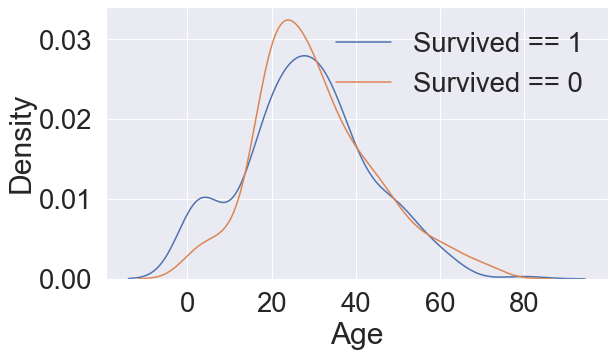

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음을 알 수 있음.

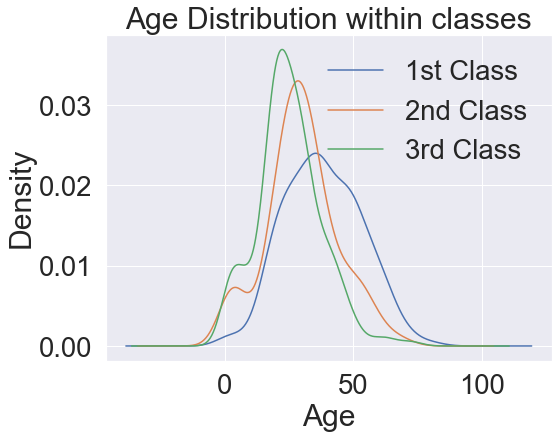

In [21]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Pclass가 높을 수록 나이 많은 사람의 비중이 많다는 것을 알 수 있음.

- 나이대가 변하면서 생존률이 어떻게 변할까?

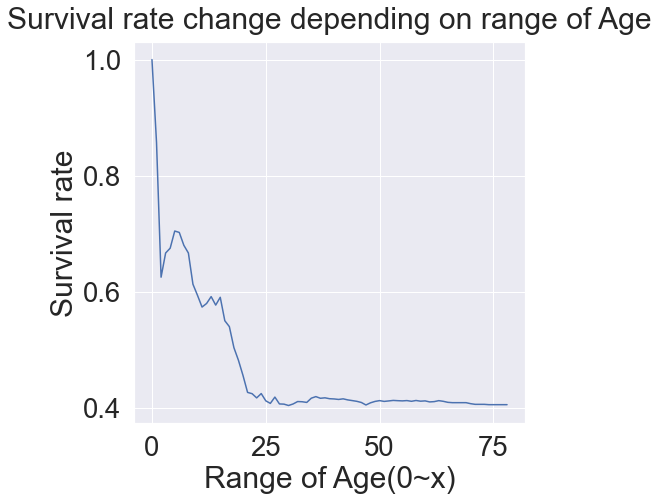

In [22]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 높다는 것을 알 수 있음.

- 나이가 중요한 feature 라는 것을 알 수 있음.

## Pclass, Sex, Age

- Sex, Pclass, Age, Survived 모두에 대해서 한꺼번에 보기 위해서는 어떻게 해야할까?

- 이를 쉽게 해주는 것이 seaborn의 violinplot 임.

- x 축을 우리가 나눠서 보고싶어하는 case(여기서 Pclass, Sex)를 나타내고, y 축은 보고 싶어하는 distribution(Age)를 사용.

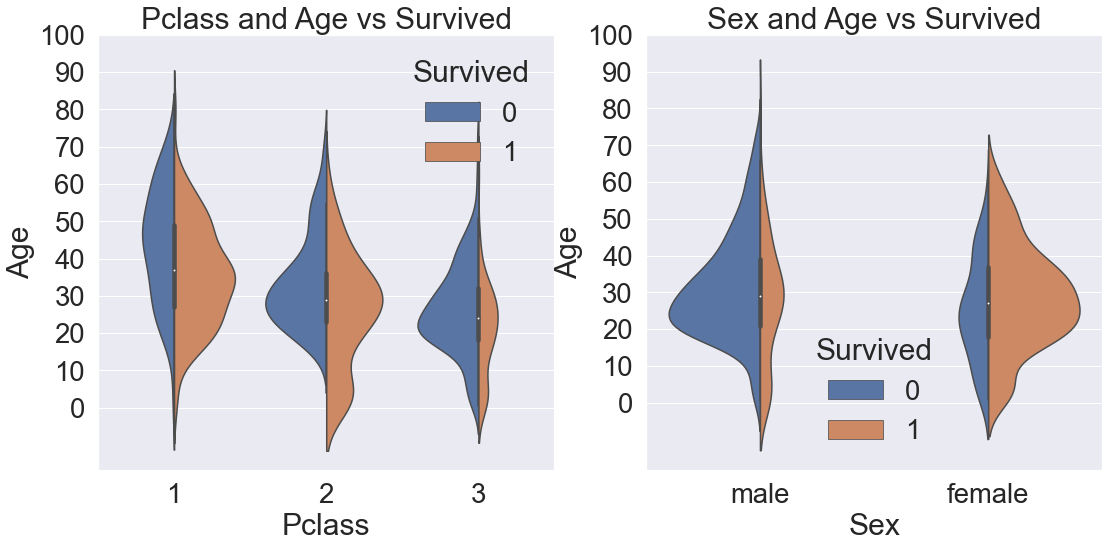

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽 그림, Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부 까지 구분함.

- 오른쪽 그림, Sex 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부 까지 구분함.


- 생존만 봤을 때, 모든 Pclass에서 나이가 어릴수록 생존을 많이 한 것을 볼 수 있음.

- 그리고 오른쪽 그림을 보면, 명확히 여자가 생존을 많이 한 것을 알 수 있음.

- 이를 통해서 여성과 아이를 먼저 챙긴 것을 알 수 있음.

## Embarked

- Embarked는 탑승한 항구를 나타냄

- 탑승한 항구에 따른 생존률을 확인

<AxesSubplot:xlabel='Embarked'>

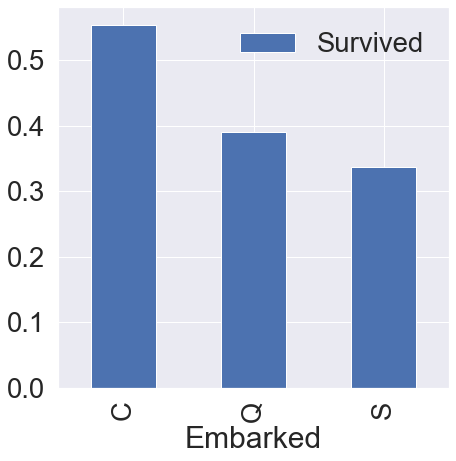

In [24]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 어느정도 차이가 있지만, 생존률은 비슷함.

- Embarked와 다른 feature간의 관계도 살펴보자.

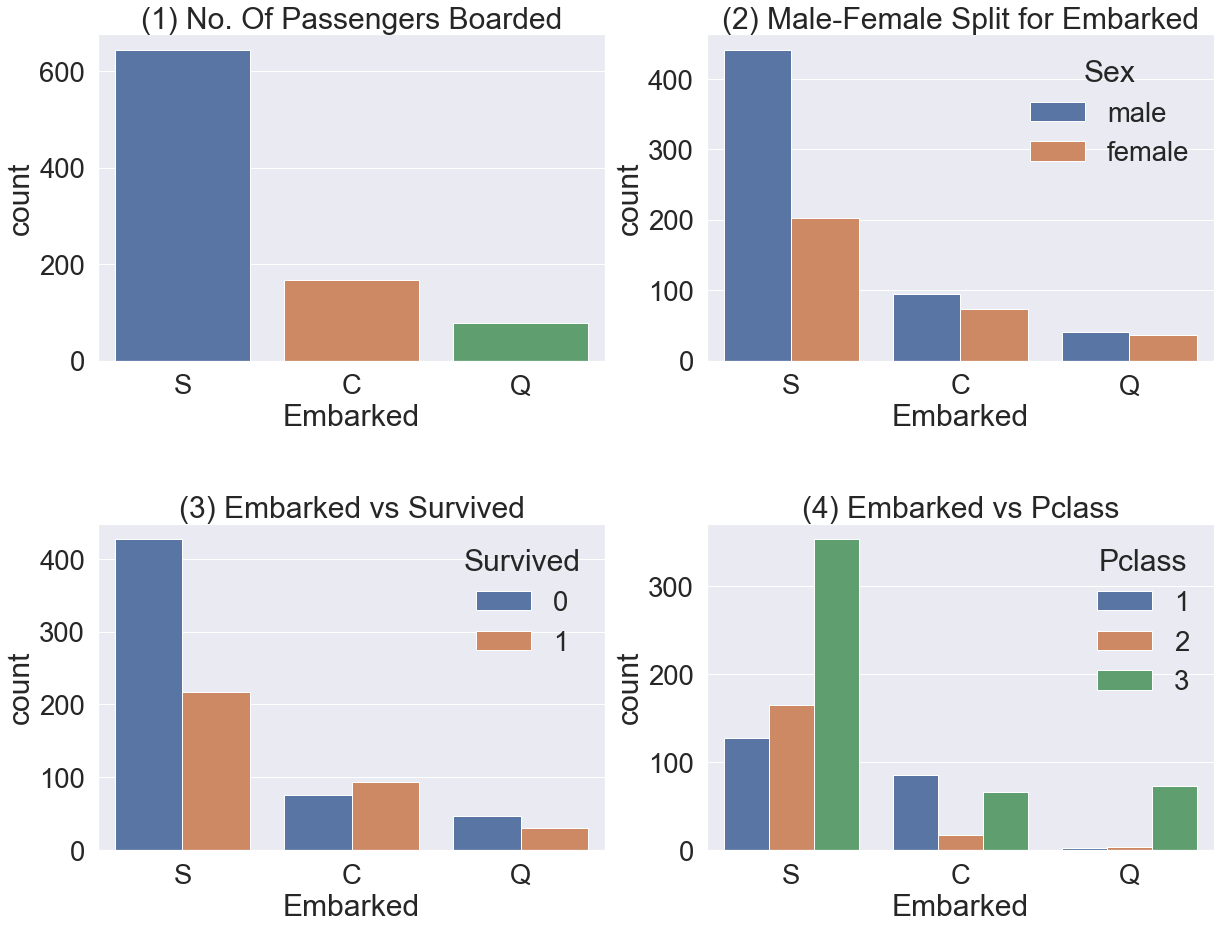

In [25]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 보면, S에서 가장 많은 사람이 탑승했다는 것을 알 수 있음.

- Figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많음.

- Figure(3) - 생존률이 S 경우 많이 낮은 것을 볼 수 있음.

- Figure(4) - Class로 split 해서 보니, C가 생존률이 높은건 Pclass가 높은 사람이 많이 타서 그렇다는 것을 알 수 있음. 그에 반면 S는 3rd class가 많아서 생존률이 낮게 나옴.

## Family - SibSp(형제 자매) + Parch(부모, 자녀)

- SibSp + Parch = Family, Family로 합쳐서 분석

In [26]:
# 자신을 포함해야해서 1을 더함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [27]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


- FamilySize와 생존의 관계를 살펴보자.

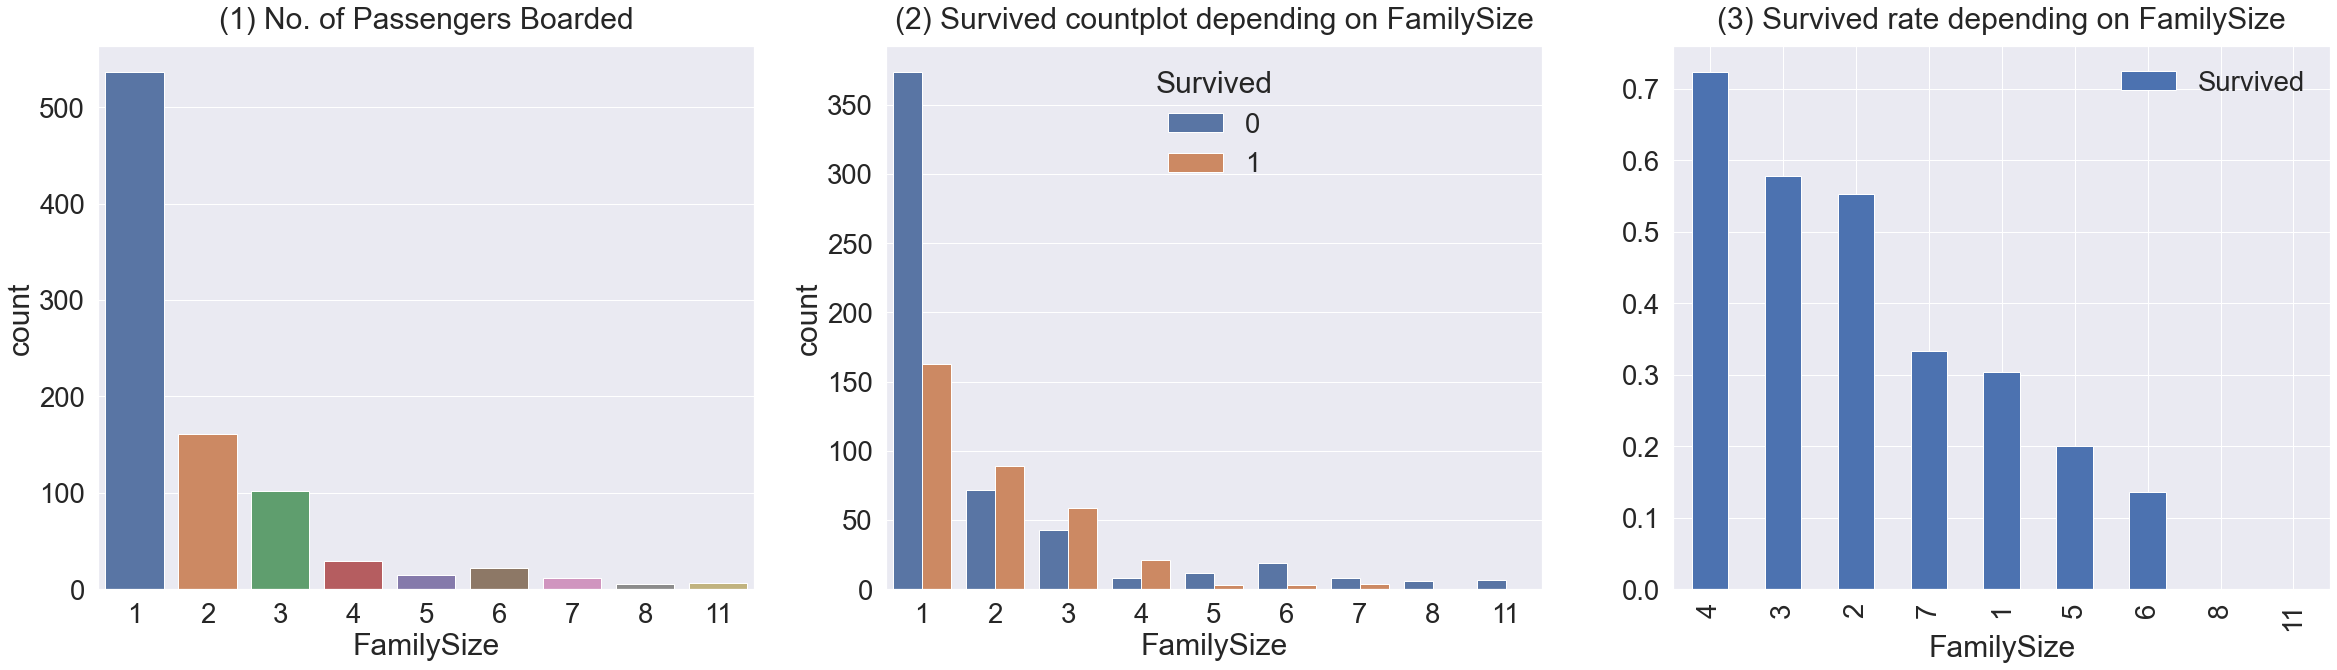

In [28]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있음. 대부분 1명이고 그 다음으로 2, 3, 4명임.

- Figure (2), (3) - 가족 크기에 따른 생존비교. 가족이 4명인 경우가 가장 생존확률이 높음. 가족수가 너무 많아질수록(5, 6, 7, 8, 11) 생존확률이 낮아짐. 가족수가 너무 작아도, 너무 커도 생존확률이 작다는 것을 알 수 있음. 2~4명 선에서 생존확률이 높다는 거을 알 수 있음.

## Fare

- Fare는 탑승요금이며, contious feature이다. 이를 히스토그램으로 분석해보자.

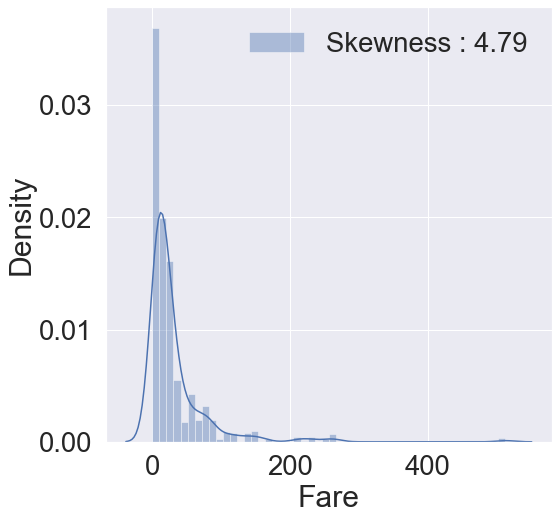

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 그래프를 보면, distribution이 매우 비대칭임을 알 수 있음. (high skewness)

- 이를 그대로 모델이 넣는다면, 모델이 잘못 학습할 가능성이 있음. WHY? 몇개 없는 outlier에 대해서 너무 민감하게 반응해서

- outlier의 영향을 줄이기 위해 Fare 에 log를 취함. 스케일링을 통해서 Fare의 분포를 정규분포 형태로 만들어주는 것.

In [30]:
def apply_log1p(x):
    return np.log1p(x) if x > 0 else 0

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test.Fare.mean()

df_train.Fare = df_train.Fare.apply(apply_log1p)
df_test.Fare = df_test.Fare.apply(apply_log1p)

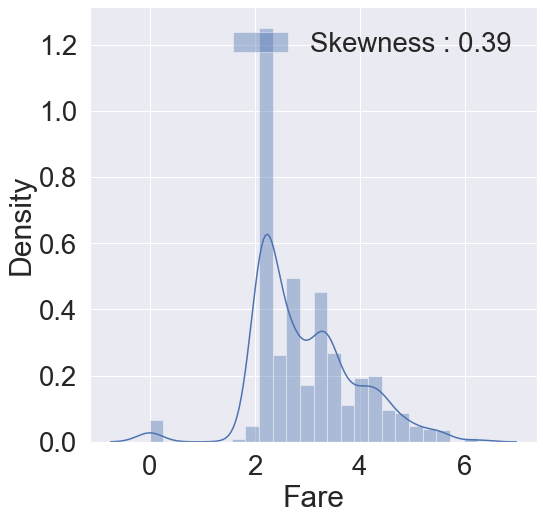

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 적용함으로써, 비대칭성을 어느 정도 잡아줌.

- 이러한 것을 feature engineering 이라고 함.

- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고함.

## Cabin

- Cabin은 결측치값의 비율이 80%, 생존에 영향 미칠 중요한 정보를 얻어내기 힘듬.

## Ticket

- Ticket는 결측치가 없음. Object 타입인 범주형 데이터임.

- feature engineering을 통해서 데이터를 가공할 필요가 있음.

In [32]:
df_train.Ticket.value_counts()

CA. 2343      7
1601          7
347082        7
CA 2144       6
347088        6
             ..
A/5. 13032    1
374746        1
C.A. 6212     1
11765         1
113059        1
Name: Ticket, Length: 681, dtype: int64

# Feature engineering

- 먼저 dataset에 존재하는 null data를 채워야 한다.

- feature의 통계를 참고하거나, 다른 아이디어를 통해서 채울 수 있음.

- null data를 어떻게 채우느냐에 따라 모델의 성능이 바뀔 수 있기 때문에 신경써줘야함.

- Feature enginnering 은 실제 모델의 학습에 쓰기 위해 하는 것이기 떄문에 train 뿐만 아니라 test에도 똑같이 적용해야 됨.

In [33]:
df_train = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

## Fill Null

### Fill Null in Age using title

- Age 에는 NaN값이 177개 존재. 이를 채우기 위해서 여기서는 title + statistics를 사용

- 영어에는 Miss, Mrr, Mrs 같은 title이 존재. 각 탑승객의 이름에는 꼭 이런 title이 들어가게되는 데 이를 사용

- pandas series에는 data를 string으로 바꿔주는 str method, 정규표현식을 적용할 수 있는 extract method가 있음. 이를 사용하여 title을 쉽게 추출할 수 있음. 그후에 title을 Initial column에 저장

In [34]:
# title을 추출
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

- pandas의 crosstab 을 이용하여 추출한 Initial과 Sex 간의 count 확인

In [35]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 위 테이플을 참고하여, 남자, 여자가 쓰는 initial을 구분하고, replace 메서드를 사용해서 특정 데이터 값을 원하는 값으로 치환

In [36]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [37]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

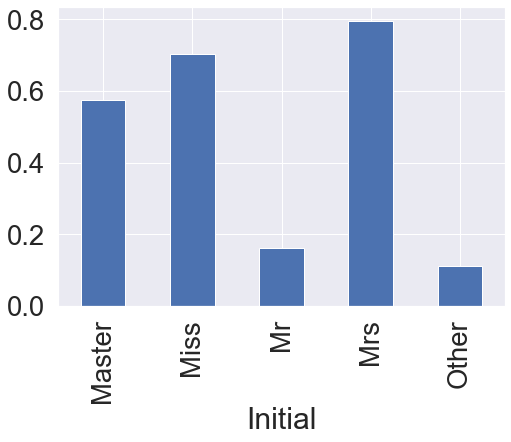

In [38]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- NaN 값을 채워보자. 아까전에도 말했듯이 통계를 활용하는 방법도 있고, 또는 null data가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어서 예측해서 채워넣는 방법도 있음. 여기서는 통계를 활용해서 데이터를 채움

- 여기서 활용한 통계는 훈련 데이터 셋을 통해서 얻은 것이며, 테스트 데이터셋은 unseen 으로 둔 상태어야 함.

- 훈련 데이터 셋에서 얻은 통계 정보를 기반으로 훈련 데이터셋의 결측치 또는 테스트 데이터셋의 결측치를 채워야함.

In [39]:
# Age의 평균을 이용해 Null value를 채움.
# Initial에 해당하는 탑승객의 평균을 이용해 Null value를 채움.

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

### Fill Null in Embarked

In [40]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has  2 Null values


- Embarked 는 Null value가 2개, S에서 가장 많은 탑승객이 있었으므로, 간단하게 S로 채움.

In [41]:
df_train['Embarked'].fillna('S', inplace=True)

## Change Age(continuous to categorical)

- 여기서 Age는 continuous feature임. 이대로 사용해도 되지만, 몇개의 group으로 나누어 category화 시켜줄 수 도 있음.

- continuous 를 categorical 로 바꾸면 information loss가 생길 수 있음.

In [42]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [43]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [44]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [45]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## Change Initial, Embarked and Sex (string to numerical)

- Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있음.

- 이런 카테고리로 표현되어져 있는 데이털르 모델에 인풋으로 넣어줄 때 컴퓨터가 인식할 수 있도록 수치화 시켜줘야 됨.

- map 메서드를 이용하면 이를 간편하게 할 수 있음.

In [46]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

- Embarked 도 C, Q, S로 이루어져 있음. map을 활용해 바꿔보자.

In [47]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [48]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [50]:
df_train['Embarked'].isnull().any()

False

- Sex 도 Female, male로 이루어져 있음. map을 이용해 바꿔보자.

In [51]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

- 여기서 각 feature 간의 상관관계를 한번 보고자 함. 두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있음. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미함. 0은 상관관계가 없다는 것을 의미함.

- feature별로 상관계수를 편하게 보기 위해서 heatmap plot을 이용할 수 있고, corr() 메서드를 통해서 피어슨 상관계수를 계산할 수 있음.

$$
\begin{align}
r_{xy} =
\dfrac{\text{Cov}\left(x, y\right)}{S_xS_y} =
\dfrac{{1 \over n-1}\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{S_xS_y}
\end{align}
$$

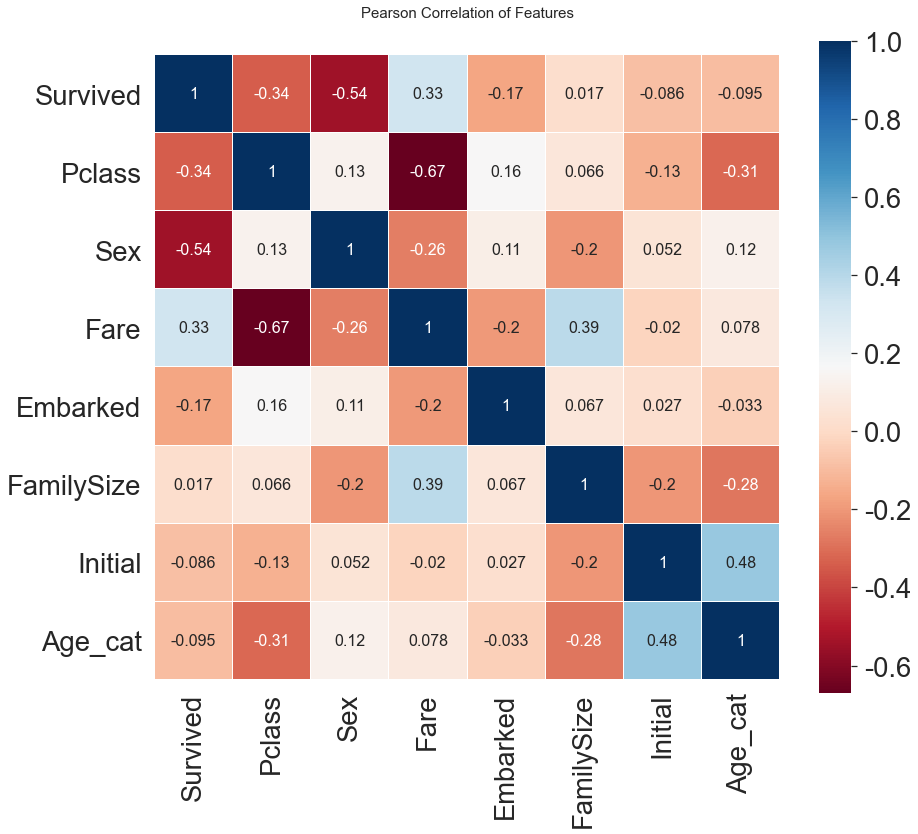

In [52]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

- EDA에서 살펴봤듯이, Sex 와 Pclass 가 Survived에 상관관계가 어느 정도 있음을 볼수 있음.

- 여기서 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것.

- 모델을 학습시킬 때, 불필요한(redundant, suerfluous) feature가 없다는 것을 의미함.

- 1 또는 -1의 상관관계를 가진 feature A, B가 있다면, 여기서 얻을 수 있는 정보는 사실 하나밖에 없다는 것을 의미함.

## One-hot encdoing on Initial and Embarked

- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델에 따라서 one-hot encoding을 해줄 필요가 있음.

- 수치화는 간단히 Master == 0, Miss == 1, Mr = 2, Mrs == 3, Other ==4 로 매핑하는 것을 말함.

- One-hot encoding 은 위 카테고리를 아래와 같이 (0, 1)로 이루어진 5차원의 벡터로 나타내는 것을 말함.

||Initial_Master|Initial_Miss|Initial_Mr|Initial_Mrs|Initial_Other|
|-|-|-|-|-|-|
|Mater|1|0|0|0|0
|Miss|0|1|0|0|0
|Mr|0|0|1|0|0
|Mrs|0|0|0|1|0
|Other|0|0|0|0|1

- 위와 같은 작업을 직접 코딩할 수도 있지만, pandas의 get_dummies를 사용하면 손쉽게 할 수 있음.

- 총 5개의 카테고리이니, one-hot encoding을 하고나면 새로운 5개의 column이 생겨남.

In [53]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [54]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


- Embarked 에도 동일하게 one-hot encoding을 적용

In [55]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

- sklearn의 Labelencoder + OneHotencoder를 이용해도 one-hot encoding을 할 수 있음.

## Drop columns

- 필요한 columns만 남기고 나머지는 다 제거

In [56]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [57]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [58]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# Building machine learning model and prediction using the trained model

- Sklearn 은 머신러닝의 처음부터 끝까지가 다 있습니다. feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프라인 등 머신러닝에 관련된 모든 작업들이 손쉬운 인터페이스로 구현되어 있습니다. 데이터 분석 + 머신러닝을 하고싶다면, 이 라이브러리는 반드시 숙지해야합니다.

- 지금 타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary) binary classfication 문제입니다.

- 우리가 지금 가지고 있는 train set 의 survived를 제외한 input 을 가지고 모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어 냅니다.

- 그 후 모델이 학습하지 않았던 test set 을 input 으로 주어서 test set 의 각 샘플(탑승객)의 생존 유무를 예측해봅니다.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Preparation - Split dataset into train, valid, test set

- 학습에 쓰일 데이터와 target label을 분리.

In [60]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [61]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=42)

## Model generation and prediciton

- 각 머신러닝 알고리즘에는 여러 파라미터들이 존재. 이것들을 어떻게 설정하냐에 따라서 같은 데이터라도 모델의 성능이 달라짐.

- 하이퍼파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해등이 필요함.

In [62]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [63]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 78.73% 정확도로 생존을 맞춤


## Feature importance

- 랜덤포레스트 같은 학습된 모델은 feature importance를 가지게 됨. 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인할 수 있음.

- 쉽게 말해, $10 = 4x_1 + 2x_2 + 1x_3$을 생각하면, x1이 결과값에 큰 영향을 준다고 생각할 수 있음.

- feature importance는 4, 2, 1을 이야기하며 $x_1$이 가장 큰 값을 가지므로, 이 모델에 가장 큰 영향을 미친다고 말할 수 있음.

In [64]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_test.columns)

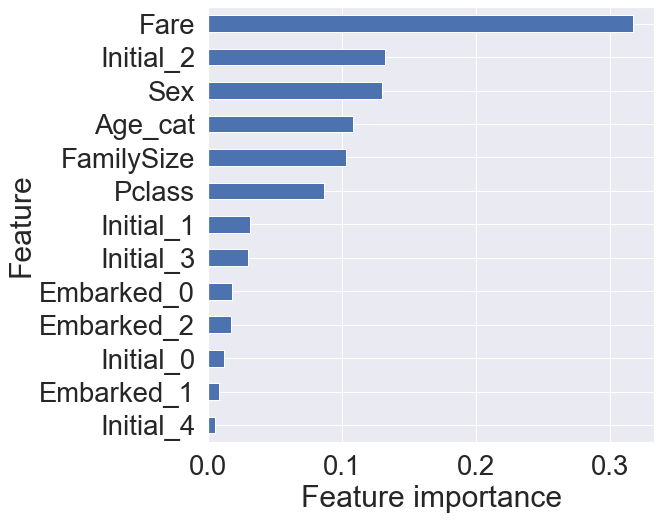

In [65]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- 여기서는 Fare이 가장 큰 영향력을 가지며, Initial_2, Age_cat, Sex가 차례로 중요도를 가짐.

- feature importance는 지금 모델에서의 importance를 나타냄. 다른 모델을 사용한다면 feature importance는 다르게 나올 수 있음. 따라서 통계적으로 더 살펴봐야 함.

- feature importance를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection을 할 수 있고, 좀더 빠른 모델을 위해 feature 제거를 할 수 있음.

- 보통 feature의 중요도를 판단할 때, permutation importance를 많이 사용함

## Prediction on Test set

- 테스트셋을 통해서 모델에 생존 여부를 예측

In [66]:
submission = pd.read_csv('../data/titanic/gender_submission.csv')

In [67]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [68]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [69]:
# submission.to_csv('./my_first_submission.csv', index=False)

2.8938462379200263